In [24]:
import numpy as np
import os
import dataprovider3 as dp3
from dataprovider3 import emio

# Input
base_dir = '~/Data_local/datasets/pinky/ground_truth/stitched_vol40-vol41/'
base_dir = os.path.expanduser(base_dir)
fname = os.path.join(base_dir, 'img.h5')
img = emio.imread(fname)

# Target
base_dir = '~/Data_local/datasets/pinky/ground_truth/stitched_vol40-vol41/'
base_dir = os.path.expanduser(base_dir)
fname = os.path.join(base_dir, 'seg.h5')
seg = emio.imread(fname)

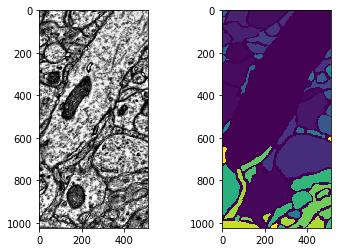

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(img[1,:,:], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(seg[1,:,:])
plt.show()

In [26]:
# Create dataset.
spec = dict(img=(84,268,268), seg=(55,55,55))
dset = dp3.Dataset(spec)
dset.add_data('img', img)
dset.add_data('seg', seg)

In [28]:
import augmentor as aug

# Augmentor.
warp = aug.Warp()

In [32]:
for _ in range(100):
    new_spec = warp.prepare(spec, imgs=['img'])
    sample = dset(spec=new_spec)

In [33]:
import imageio

img = sample['img']
images = []
for z in range(img.shape[-3]):
    images.append(img[0,z,:,:].astype('uint8'))
imageio.mimsave('before.gif', images)

In [34]:
print(sample['img'].shape)
print(sample['seg'].shape)
sample = warp(sample, imgs=['img'])
print(sample['img'].shape)
print(sample['seg'].shape)

(1, 84, 338, 392)
(1, 55, 125, 179)
(1, 84, 268, 268)
(1, 55, 55, 55)


In [42]:
import imageio

img = sample['img']
images = []
for z in range(img.shape[-3]):
    images.append(img[0,z,:,:].astype('uint8'))
imageio.mimsave('after.gif', images)

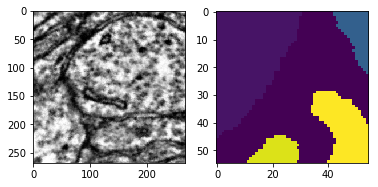

In [23]:
fig = plt.figure()
plt.subplot(1,2,1)
img = sample['img']
plt.imshow(img[0,0,:,:], cmap='gray')
plt.subplot(1,2,2)
seg = sample['seg']
plt.imshow(seg[0,0,:,:])
plt.show()